In [1]:
import mysql.connector as con

from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# convert data from SQL to Pandas DataFrame

read SQL commands from .sql file

In [2]:
fd = open('SQLData/claims_v1_live.sql', 'r')
sqlFile = fd.readlines()
fd.close()

In [3]:

commands = []
statement = ""

for line in tqdm(sqlFile):

    line = line.replace('\n','')
    
    if re.search(r'--', line):  # ignore sql comment lines
        continue
       
    if re.search(r'/*!',line):
        continue
    
    if not re.search(r';$', line):  # keep appending lines that don't end in ';'
        statement = statement + line
        
    else:  # when you get a line ending in ';' then exec statement and reset for next statement
        statement = statement + line
        commands.append(statement)

        statement = ""



100%|██████████| 1026688/1026688 [00:07<00:00, 131825.72it/s]


In [10]:
print(commands[5])

INSERT INTO `cares` (`id`, `name`, `base_name`, `type`, `active`, `created_at`, `updated_at`, `nlp_result`, `type_id`, `meta`, `drug_generic_id`, `parent_id`, `cve_version`) VALUES(729, 'DOCITAXEL 80MG INJ - 1 VIAL', NULL, NULL, 1, '2018-02-14 12:32:17', '2018-02-14 12:32:17', NULL, NULL, NULL, NULL, NULL, NULL),(730, 'DOPAMINE INJ 40MG - 1 AMPOULE', NULL, NULL, 1, '2018-02-14 12:32:17', '2018-02-14 12:32:17', NULL, NULL, NULL, NULL, NULL, NULL),(731, 'DRUJELA GEL 10G - 1 TUBE', NULL, NULL, 1, '2018-02-14 12:32:17', '2018-02-14 12:32:17', NULL, NULL, NULL, NULL, NULL, NULL),(732, 'DUCOLAX SUPPOSITORY - 1 SUPPO', NULL, NULL, 1, '2018-02-14 12:32:17', '2018-02-14 12:32:17', NULL, NULL, NULL, NULL, NULL, NULL),(733, 'DUOVIR 650MG TAB - 1 TABLET', NULL, NULL, 1, '2018-02-14 12:32:17', '2018-02-14 12:32:17', NULL, NULL, NULL, NULL, NULL, NULL),(734, 'DUPHASTON TABLET 10MG - 1 TABLET', NULL, NULL, 1, '2018-02-14 12:32:17', '2018-02-14 12:32:17', NULL, NULL, NULL, NULL, NULL, NULL),(735, 'DYN

In [4]:
len(commands)

2430

In [5]:
cur = con.connect(host='localhost',database='mysql',user='root',password='52dna52myaim')

In [6]:
cursor =cur.cursor()

Create mySQL database using commands

In [8]:

skip = []

cursor.execute("drop table cares;")
cursor.execute("drop table care_types;")
cursor.execute("drop table claims;")
for command in tqdm(commands):

    try:
        cursor.execute(command)
    except:
        skip.append(command)


100%|██████████| 2430/2430 [00:20<00:00, 120.98it/s]


In [9]:
len(skip)

1853

### Get data from mySQL to data frame

In [25]:
table_names = ['cares', 'care_types', 'claim_comments', 'claim_diagnoses', 'claim_items', 'claims','comments',\
          'diagnoses', 'provider_tariffs']          

In [24]:
tables = {}
table_columns = {}

In [26]:
for t in table_names:
    print(t)
    fetchdata = "select * from " + t + ";"
    cursor.execute(fetchdata)
    tables[t] = cursor.fetchall()
    
    fetchcolumn = "show columns from " + t + ";"
    cursor.execute(fetchcolumn)
    table_columns[t] = cursor.fetchall()

cares
care_types
claim_comments
claim_diagnoses
claim_items
claims
comments
diagnoses
provider_tariffs


In [27]:
for k in tables:
    print(k)

cares
care_types
claim_comments
claim_diagnoses
claim_items
claims
comments
diagnoses
provider_tariffs


In [30]:
total = 0
for k in tables:
    print(k,' : ',len(tables[k]))
    total += len(tables[k])
total

cares  :  83124
care_types  :  15
claim_comments  :  402
claim_diagnoses  :  112119
claim_items  :  323149
claims  :  62451
comments  :  3109
diagnoses  :  104272
provider_tariffs  :  335181


1023822

In [32]:
# converts results to dataframe
# all tables into a dictionary
all_df = {}

for k in tqdm(tables):
    # initiate dataframe
    print(k) # print table name
    data = {}
   
    # initiate dictionary for each table
    columns = []
    for name in table_columns[k]:
        data[name[0]] = [] # initiate data
        columns.append(name[0]) # get column name
        
    for row in range(len(tables[k])):
        temp = tables[k][row] # fetch data
        for col in range(len(columns)): 
            data[columns[col]].append(temp[col]) # allocate data to each column for each row
         
    all_df[k] = pd.DataFrame(data) # convert dictionary of table to dataframe



  0%|          | 0/9 [00:00<?, ?it/s]

cares


 11%|█         | 1/9 [00:00<00:03,  2.20it/s]

care_types
claim_comments
claim_diagnoses


 44%|████▍     | 4/9 [00:00<00:01,  2.94it/s]

claim_items


 56%|█████▌    | 5/9 [00:02<00:03,  1.16it/s]

claims


 67%|██████▋   | 6/9 [00:03<00:02,  1.23it/s]

comments
diagnoses


 89%|████████▉ | 8/9 [00:03<00:00,  1.57it/s]

provider_tariffs


100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


In [35]:
# save dataframe to csv
for table in all_df:
    filename = 'Data/'+ table + '.csv'
    all_df[table].to_csv(filename)

# explore data of each table

In [39]:
# explore head for each table
for table in all_df:
    print(table)
    display(all_df[table].head(5))
    print('\n')

cares


id                 name base_name           type  active  \
0   2          Chest X-ray      None  INVESTIGATION       1   
1   6           Gentamycin      None           DRUG       1   
2   7             Amikacin      None           DRUG       1   
3   8  Metronidazole 500mg      None           DRUG       1   
4   9         Consultation      None           None       1   

           created_at          updated_at nlp_result  type_id  meta  \
0 2019-04-23 15:27:50 2019-09-26 18:40:31       None      NaN  None   
1 2019-04-23 15:27:50 2019-10-05 18:14:30       None      1.0  None   
2 2019-04-23 15:27:50 2019-10-06 01:58:26       None      1.0  None   
3 2019-04-23 15:27:50 2019-04-23 15:27:50       None      NaN  None   
4 2019-04-23 15:27:50 2019-04-23 15:27:50       None      NaN  None   

   drug_generic_id parent_id  cve_version  
0              NaN      None          NaN  
1            927.0      None          NaN  
2            178.0      None          NaN  
3              NaN      None          NaN  
4              NaN      None          NaN



care_types


id           name                                               meta  \
0   1     MEDICATION  ["STRENGTH","FORM","DOSAGE","ROUTE_OR_MODE","T...   
1   2  INVESTIGATION                                               None   
2   3   CONSULTATION                                               None   
3   4      PROCEDURE                                               None   
4   6  MISCELLANEOUS                                               None   

   cve_version  
0          NaN  
1          2.0  
2          2.0  
3          2.0  
4          NaN



claim_comments


id  claim_id  user_id                                            message  \
0   1        33        9                                     capitated bill   
1   2        58        5                                        vetted yet?   
2   3      2682       24  INCOMPLETE CLAIMS. PLEASE, DO NOT PROCESS THIS...   
3   4      3781       21  PCM 18 TAB ADMINISTERED & FOLIC ACID 14 TAB AD...   
4   5      3893       21  AUGMENTIN 10 TAB, IBUPROFEN 15TAB, LISINOPRIL ...   

           created_at          updated_at  
0 2018-05-21 10:25:20 2018-05-21 10:25:20  
1 2018-10-18 18:51:36 2018-10-18 18:51:36  
2 2018-11-09 15:00:30 2018-11-09 15:00:30  
3 2018-11-19 10:50:59 2018-11-19 10:50:59  
4 2018-11-21 11:31:30 2018-11-21 11:31:30



claim_diagnoses


id  claim_id  diagnosis_id
0  15        10             9
1  16        11         15925
2  36        13          4342
3  37        14         15925
4  38        15          6190



claim_items


id  claim_id  care_id   amount          created_at  hmo_approved  \
0  16        10      586  1816.08 2018-03-12 14:53:46             1   
1  17        11      586  1816.08 2018-03-13 14:50:39             1   
2  56        13      434   115.00 2018-03-16 10:28:53             1   
3  57        13     1102  1265.00 2018-03-16 10:28:53             1   
4  58        13      299   138.00 2018-03-16 10:28:53             1   

           updated_at  qty approved_amount  approved_qty  comment_id  \
0 2018-05-21 10:05:30    6         1816.08             6         NaN   
1 2018-05-21 10:07:19    6         1816.08             6         NaN   
2 2018-05-21 10:09:30    5          115.00             5         NaN   
3 2018-05-21 10:09:30   10         1265.00            10         NaN   
4 2018-05-21 10:09:30   15          138.00            15         NaN   

   drug_frequency  drug_duration  drug_duration_sub  tariff_id  
0             NaN            NaN                NaN        NaN  
1             NaN            NaN                NaN        NaN  
2             NaN            NaN                NaN        NaN  
3             NaN            NaN                NaN        NaN  
4             NaN            NaN                NaN        NaN



claims


id  hmo_id  hmo_pile_id  provider_id  enrollee_id enrollee_info  \
0  10       1          1.0            1           89          None   
1  11       1          1.0            1           89          None   
2  13       1          1.0            1           74          None   
3  14       1          1.0            1           89          None   
4  15       1          1.0            1          183          None   

  admission_start admission_end   approval_code encounter_date  ...  \
0            None          None            None     2018-03-02  ...   
1            None          None            None     2018-03-02  ...   
2            None          None            None     2018-03-10  ...   
3            None          None            None     2018-03-02  ...   
4            None          None  RC/03/2PRO01AM     2018-03-11  ...   

  provider_approved_by hmo_status          created_at          updated_at  \
0                  0.0          1 2018-03-12 14:53:46 2018-05-21 10:05:30   
1                  5.0          1 2018-03-13 14:50:39 2018-05-21 10:07:19   
2                  0.0          1 2018-03-16 10:28:53 2018-05-21 10:09:30   
3                  0.0          1 2018-03-16 10:34:41 2018-05-21 10:09:56   
4                  0.0          1 2018-03-16 10:49:57 2018-05-21 10:15:05   

   hmo_skipped   log           synced_at           vetted_at  child_hmo_id  \
0            0  None 2018-11-27 12:11:53 2018-05-21 10:05:30          None   
1            0  None 2018-11-27 12:11:53 2018-05-21 10:07:19          None   
2            0  None 2018-11-27 12:11:53 2018-05-21 10:09:30          None   
3            0  None 2018-11-27 12:11:53 2018-05-21 10:09:56          None   
4            0  None 2018-11-27 12:11:53 2018-05-21 10:15:05          None   

   meta  
0  None  
1  None  
2  None  
3  None  
4  None  

[5 rows x 24 columns]



comments


id                                       name
0  1684                  \tNVESTIGATION NOT NEEDED
1  1209          Kindly Provide approval for DHeas
2  1171   clearly state the required investigation
3  3227                diff in cost of consumables
4   871               Diff in investigation cost.



diagnoses


id  icd_order icd_code  icd_header                    name  category_id  \
0   1        NaN     None         NaN                 CHOLERA          1.0   
1   2        NaN     None         NaN  TYPHOID/ ENTERIC FEVER          1.0   
2   3        NaN     None         NaN            TUBERCULOSIS          1.0   
3   4        NaN     None         NaN                    STIs          1.0   
4   5        NaN     None         NaN                    UTIs          1.0   

   active  matching_enabled nlp_meta  
0       1               NaN     None  
1       1               1.0     None  
2       1               NaN     None  
3       1               NaN     None  
4       1               NaN     None



provider_tariffs


id  hmo_id  provider_id  care_id   amount amount_range          created_at  \
0   1       1            1       11  1000.00         None 2018-02-08 13:00:23   
1   2       1            1       12   500.00         None 2018-02-08 13:00:23   
2   3       1            1       13  5000.00         None 2018-02-08 13:00:23   
3   4       1            1       14  2500.00         None 2018-02-08 13:00:23   
4   5       1            1       15  1000.00         None 2018-02-08 13:00:23   

           updated_at  meta  desc desc_synonym  
0 2018-02-08 13:00:23  None  None         None  
1 2018-02-08 13:00:23  None  None         None  
2 2018-02-08 13:00:23  None  None         None  
3 2018-02-08 13:00:23  None  None         None  
4 2018-02-08 13:00:23  None  None         None

In [40]:
# explore overall information for each table
for table in all_df:
    print(table)
    display(all_df[table].info())
    print('\n')

cares
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83124 entries, 0 to 83123
Data columns (total 13 columns):
id                 83124 non-null int64
name               83124 non-null object
base_name          4114 non-null object
type               39037 non-null object
active             83124 non-null int64
created_at         83124 non-null datetime64[ns]
updated_at         83120 non-null datetime64[ns]
nlp_result         0 non-null object
type_id            13849 non-null float64
meta               5919 non-null object
drug_generic_id    9493 non-null float64
parent_id          0 non-null object
cve_version        7088 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 8.2+ MB


None



care_types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
id             15 non-null int64
name           15 non-null object
meta           1 non-null object
cve_version    6 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 608.0+ bytes


None



claim_comments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 6 columns):
id            402 non-null int64
claim_id      402 non-null int64
user_id       402 non-null int64
message       402 non-null object
created_at    402 non-null datetime64[ns]
updated_at    402 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 19.0+ KB


None



claim_diagnoses
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112119 entries, 0 to 112118
Data columns (total 3 columns):
id              112119 non-null int64
claim_id        112119 non-null int64
diagnosis_id    112119 non-null int64
dtypes: int64(3)
memory usage: 2.6 MB


None



claim_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323149 entries, 0 to 323148
Data columns (total 15 columns):
id                   323149 non-null int64
claim_id             323149 non-null int64
care_id              323149 non-null int64
amount               323149 non-null object
created_at           323149 non-null datetime64[ns]
hmo_approved         323149 non-null int64
updated_at           323149 non-null datetime64[ns]
qty                  323149 non-null int64
approved_amount      323149 non-null object
approved_qty         323149 non-null int64
comment_id           10800 non-null float64
drug_frequency       5933 non-null float64
drug_duration        5864 non-null float64
drug_duration_sub    5799 non-null float64
tariff_id            7380 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(6), object(2)
memory usage: 37.0+ MB


None



claims
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62451 entries, 0 to 62450
Data columns (total 24 columns):
id                      62451 non-null int64
hmo_id                  62451 non-null int64
hmo_pile_id             62167 non-null float64
provider_id             62451 non-null int64
enrollee_id             62451 non-null int64
enrollee_info           0 non-null object
admission_start         1903 non-null object
admission_end           1903 non-null object
approval_code           38311 non-null object
encounter_date          62451 non-null object
total_amount            62451 non-null object
approved_amount         62451 non-null object
created_by              62451 non-null int64
provider_status         62451 non-null int64
provider_approved_by    11667 non-null float64
hmo_status              62451 non-null int64
created_at              62451 non-null datetime64[ns]
updated_at              62451 non-null datetime64[ns]
hmo_skipped             62451 non-null int64
log 

None



comments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 2 columns):
id      3109 non-null int64
name    3109 non-null object
dtypes: int64(1), object(1)
memory usage: 48.7+ KB


None



diagnoses
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 9 columns):
id                  104272 non-null int64
icd_order           94743 non-null float64
icd_code            94782 non-null object
icd_header          94743 non-null float64
name                104272 non-null object
category_id         8192 non-null float64
active              104272 non-null int64
matching_enabled    29 non-null float64
nlp_meta            0 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 7.2+ MB


None



provider_tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335181 entries, 0 to 335180
Data columns (total 11 columns):
id              335181 non-null int64
hmo_id          335181 non-null int64
provider_id     335181 non-null int64
care_id         335181 non-null int64
amount          334890 non-null object
amount_range    86 non-null object
created_at      335181 non-null datetime64[ns]
updated_at      335181 non-null datetime64[ns]
meta            6277 non-null object
desc            92913 non-null object
desc_synonym    19357 non-null object
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 28.1+ MB


None

In [126]:
# explore table: Cares
all_df['cares'].loc[all_df['cares']['id']==6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 13 columns):
id                 1 non-null int64
name               1 non-null object
base_name          0 non-null object
type               1 non-null object
active             1 non-null int64
created_at         1 non-null datetime64[ns]
updated_at         1 non-null datetime64[ns]
nlp_result         0 non-null object
type_id            1 non-null float64
meta               0 non-null object
drug_generic_id    1 non-null float64
parent_id          0 non-null object
cve_version        0 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 112.0+ bytes


In [139]:
# Explore table 'claim_items' and 'provider_tariffs'
all_df['provider_tariffs'].loc[all_df['provider_tariffs']['care_id']==6].desc
all_df['claim_items'].loc[all_df['claim_items']['claim_id']==53350]

id  claim_id  care_id    amount          created_at  hmo_approved  \
272679  378828     53350    20641  45000.00 2019-11-05 17:49:49             0   
272680  378829     53350    64592   5000.00 2019-11-05 17:49:49             0   
272681  378830     53350        6   3000.00 2019-11-05 17:49:49             0   
272682  378831     53350    73145   6000.00 2019-11-05 17:49:49             0   

                updated_at  qty approved_amount  approved_qty  comment_id  \
272679 2019-11-05 18:00:18    1        35000.00             1         NaN   
272680 2019-11-05 17:49:49    1         5000.00             1         NaN   
272681 2019-11-05 17:49:49    1         3000.00             1         NaN   
272682 2019-11-05 18:00:18    1          600.00             1         NaN   

        drug_frequency  drug_duration  drug_duration_sub  tariff_id  
272679             NaN            NaN                NaN   360441.0  
272680             NaN            NaN                NaN   351178.0  
272681             NaN            NaN                NaN   350603.0  
272682             NaN            NaN                NaN   372686.0

## integrate claim table with diagnosis

In [190]:
# get useful columns from table 'claim_items'
df1 = all_df['claim_items'][['id','claim_id','care_id','amount','qty','approved_amount','approved_qty','hmo_approved']]

In [189]:
all_df['claims'].columns

Index(['id', 'hmo_id', 'hmo_pile_id', 'provider_id', 'enrollee_id',
       'enrollee_info', 'admission_start', 'admission_end', 'approval_code',
       'encounter_date', 'total_amount', 'approved_amount', 'created_by',
       'provider_status', 'provider_approved_by', 'hmo_status', 'created_at',
       'updated_at', 'hmo_skipped', 'log', 'synced_at', 'vetted_at',
       'child_hmo_id', 'meta'],
      dtype='object')

In [210]:
# get useful columns of table 'claims'
df2 = all_df['claims'][['id','hmo_id','provider_id','enrollee_id','approval_code',\
                      'provider_status','created_at','vetted_at']]

In [237]:
# merge table 'claims' and 'claim_items'
df3 = df1.merge(df2,how='outer',left_on='claim_id',right_on='id')
df3 = df3.drop(columns = ['id_x','id_y'])
df3 = df3[['claim_id','enrollee_id','provider_id','provider_status','hmo_id','care_id','qty','amount','approved_qty','approved_amount',\
         'hmo_approved','created_at','vetted_at']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324203 entries, 0 to 324202
Data columns (total 13 columns):
claim_id           323149 non-null float64
enrollee_id        324194 non-null float64
provider_id        324194 non-null float64
provider_status    324194 non-null float64
hmo_id             324194 non-null float64
care_id            323149 non-null float64
qty                323149 non-null float64
amount             323149 non-null object
approved_qty       323149 non-null float64
approved_amount    323149 non-null object
hmo_approved       323149 non-null float64
created_at         324194 non-null datetime64[ns]
vetted_at          282385 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(9), object(2)
memory usage: 34.6+ MB


In [287]:
# get diagonosis ID
ct = all_df['claim_diagnoses'][['claim_id','diagnosis_id']].groupby('claim_id').count()
ct['diagnosis_id'].loc[ct['diagnosis_id']==16].count()

0

In [252]:
# sort 'claim' table
df3 = df3.sort_values(by=['claim_id'])
df3.head()

claim_id  enrollee_id  provider_id  provider_status  hmo_id  care_id   qty  \
0      10.0         89.0          1.0              1.0     1.0    586.0   6.0   
1      11.0         89.0          1.0              1.0     1.0    586.0   6.0   
2      13.0         74.0          1.0              1.0     1.0    434.0   5.0   
3      13.0         74.0          1.0              1.0     1.0   1102.0  10.0   
4      13.0         74.0          1.0              1.0     1.0    299.0  15.0   

    amount  approved_qty approved_amount  hmo_approved          created_at  \
0  1816.08           6.0         1816.08           1.0 2018-03-12 14:53:46   
1  1816.08           6.0         1816.08           1.0 2018-03-13 14:50:39   
2   115.00           5.0          115.00           1.0 2018-03-16 10:28:53   
3  1265.00          10.0         1265.00           1.0 2018-03-16 10:28:53   
4   138.00          15.0          138.00           1.0 2018-03-16 10:28:53   

            vetted_at  
0 2018-05-21 10:05:30  
1 2018-05-21 10:07:19  
2 2018-05-21 10:09:30  
3 2018-05-21 10:09:30  
4 2018-05-21 10:09:30

In [255]:
# merge 'claim' table with diagnosis
df5 = df3.merge(all_df['claim_diagnoses'][['claim_id','diagnosis_id']],how='left',left_on='claim_id',right_on='claim_id')

df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738882 entries, 0 to 738881
Data columns (total 14 columns):
claim_id           737828 non-null float64
enrollee_id        738855 non-null float64
provider_id        738855 non-null float64
provider_status    738855 non-null float64
hmo_id             738855 non-null float64
care_id            737828 non-null float64
qty                737828 non-null float64
amount             737828 non-null object
approved_qty       737828 non-null float64
approved_amount    737828 non-null object
hmo_approved       737828 non-null float64
created_at         738855 non-null datetime64[ns]
vetted_at          664671 non-null datetime64[ns]
diagnosis_id       737820 non-null float64
dtypes: datetime64[ns](2), float64(10), object(2)
memory usage: 84.6+ MB


In [225]:
# check comments to explore some reasons to reject the claim
comments1 = all_df['claim_items'][['claim_id','comment_id']].merge(all_df['claim_comments'][['id','message']],how='left',\
                                                     left_on='comment_id',right_on='id')
comments = comments1.drop(columns=['id']).merge(all_df['comments'][['id','name']],how='left',left_on='comment_id',right_on='id')
comments = comments.drop(columns=['id'])
comments.columns = ['claim_id','comment_id','message','additional_note']
comments.dropna().head()


claim_id  comment_id                                   message  \
106          49       377.0  Rejected Items are covered by capitation   
5970       1183        18.0            LOSARTAN TAB 25MG ADMINISTERED   
18646      3781         2.0                               vetted yet?   
52779     10364        35.0                             RECURRENT PID   
56994     11177        35.0                             RECURRENT PID   

              additional_note  
106    Diff in procedure cost  
5970        Capitation covers  
18646                      ok  
52779        ? INDICATION\r\r  
56994        ? INDICATION\r\r

In [290]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323149 entries, 0 to 323148
Data columns (total 4 columns):
claim_id           323149 non-null int64
comment_id         10800 non-null float64
message            481 non-null object
additional_note    10800 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 12.3+ MB


In [288]:
# merge comments with claim table
df = df3.merge(comments,how='left',left_on='claim_id',right_on='claim_id')
df.head()

claim_id  enrollee_id  provider_id  provider_status  hmo_id  care_id  qty  \
0      10.0         89.0          1.0              1.0     1.0    586.0  6.0   
1      11.0         89.0          1.0              1.0     1.0    586.0  6.0   
2      13.0         74.0          1.0              1.0     1.0    434.0  5.0   
3      13.0         74.0          1.0              1.0     1.0    434.0  5.0   
4      13.0         74.0          1.0              1.0     1.0    434.0  5.0   

    amount  approved_qty approved_amount  hmo_approved          created_at  \
0  1816.08           6.0         1816.08           1.0 2018-03-12 14:53:46   
1  1816.08           6.0         1816.08           1.0 2018-03-13 14:50:39   
2   115.00           5.0          115.00           1.0 2018-03-16 10:28:53   
3   115.00           5.0          115.00           1.0 2018-03-16 10:28:53   
4   115.00           5.0          115.00           1.0 2018-03-16 10:28:53   

            vetted_at  comment_id message additional_note  
0 2018-05-21 10:05:30         NaN     NaN             NaN  
1 2018-05-21 10:07:19         NaN     NaN             NaN  
2 2018-05-21 10:09:30         NaN     NaN             NaN  
3 2018-05-21 10:09:30         NaN     NaN             NaN  
4 2018-05-21 10:09:30         NaN     NaN             NaN

In [292]:
# save claim information
df3.to_csv('Processed_data/claims.csv')

In [227]:
# save all integrated data
df.to_csv('Processed_data/integrated_data.csv')

## Integrating table tariffs

In [2]:
df1 = pd.read_csv('Processed_data/full_clean_data.csv',index_col=0)
tax = pd.read_csv('Data/provider_tariffs.csv',index_col=0)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1.head()


claim_id  enrollee_id  provider_id  provider_status  hmo_id  care_id   qty  \
0      10.0         89.0          1.0              1.0     1.0    586.0   6.0   
1      11.0         89.0          1.0              1.0     1.0    586.0   6.0   
2      13.0         74.0          1.0              1.0     1.0    434.0   5.0   
3      13.0         74.0          1.0              1.0     1.0   1102.0  10.0   
4      13.0         74.0          1.0              1.0     1.0    299.0  15.0   

    amount  approved_qty  approved_amount  hmo_approved           created_at  \
0  1816.08           6.0          1816.08           1.0  2018-03-12 14:53:46   
1  1816.08           6.0          1816.08           1.0  2018-03-13 14:50:39   
2   115.00           5.0           115.00           1.0  2018-03-16 10:28:53   
3  1265.00          10.0          1265.00           1.0  2018-03-16 10:28:53   
4   138.00          15.0           138.00           1.0  2018-03-16 10:28:53   

             vetted_at  label  unit_price    id  diagnosis_id  
0  2018-05-21 10:05:30      0      302.68  15.0           9.0  
1  2018-05-21 10:07:19      0      302.68  16.0       15925.0  
2  2018-05-21 10:09:30      0       23.00  36.0        4342.0  
3  2018-05-21 10:09:30      0      126.50  36.0        4342.0  
4  2018-05-21 10:09:30      0        9.20  36.0        4342.0

In [4]:
tax.head()

id  hmo_id  provider_id  care_id  amount  amount_range  \
0   1       1            1       11  1000.0           NaN   
1   2       1            1       12   500.0           NaN   
2   3       1            1       13  5000.0           NaN   
3   4       1            1       14  2500.0           NaN   
4   5       1            1       15  1000.0           NaN   

            created_at           updated_at meta desc desc_synonym  
0  2018-02-08 13:00:23  2018-02-08 13:00:23  NaN  NaN          NaN  
1  2018-02-08 13:00:23  2018-02-08 13:00:23  NaN  NaN          NaN  
2  2018-02-08 13:00:23  2018-02-08 13:00:23  NaN  NaN          NaN  
3  2018-02-08 13:00:23  2018-02-08 13:00:23  NaN  NaN          NaN  
4  2018-02-08 13:00:23  2018-02-08 13:00:23  NaN  NaN          NaN

In [7]:
df = df1.merge(tax[['care_id','hmo_id','provider_id','amount']], how='left',left_on=['care_id','provider_id','hmo_id'],\
               right_on=['care_id','provider_id','hmo_id'])
df.head()

claim_id  enrollee_id  provider_id  provider_status  hmo_id  care_id   qty  \
0      10.0         89.0          1.0              1.0     1.0    586.0   6.0   
1      11.0         89.0          1.0              1.0     1.0    586.0   6.0   
2      13.0         74.0          1.0              1.0     1.0    434.0   5.0   
3      13.0         74.0          1.0              1.0     1.0   1102.0  10.0   
4      13.0         74.0          1.0              1.0     1.0    299.0  15.0   

   amount_x  approved_qty  approved_amount  hmo_approved           created_at  \
0   1816.08           6.0          1816.08           1.0  2018-03-12 14:53:46   
1   1816.08           6.0          1816.08           1.0  2018-03-13 14:50:39   
2    115.00           5.0           115.00           1.0  2018-03-16 10:28:53   
3   1265.00          10.0          1265.00           1.0  2018-03-16 10:28:53   
4    138.00          15.0           138.00           1.0  2018-03-16 10:28:53   

             vetted_at  label  unit_price    id  diagnosis_id  amount_y  
0  2018-05-21 10:05:30      0      302.68  15.0           9.0    302.68  
1  2018-05-21 10:07:19      0      302.68  16.0       15925.0    302.68  
2  2018-05-21 10:09:30      0       23.00  36.0        4342.0     23.00  
3  2018-05-21 10:09:30      0      126.50  36.0        4342.0    126.50  
4  2018-05-21 10:09:30      0        9.20  36.0        4342.0      9.20

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744870 entries, 0 to 744869
Data columns (total 18 columns):
claim_id           744870 non-null float64
enrollee_id        744870 non-null float64
provider_id        744870 non-null float64
provider_status    744870 non-null float64
hmo_id             744870 non-null float64
care_id            744870 non-null float64
qty                744870 non-null float64
amount_x           744870 non-null float64
approved_qty       744870 non-null float64
approved_amount    744870 non-null float64
hmo_approved       744870 non-null float64
created_at         744870 non-null object
vetted_at          744870 non-null object
label              744870 non-null int64
unit_price         744870 non-null float64
id                 744861 non-null float64
diagnosis_id       744861 non-null float64
amount_y           668049 non-null float64
dtypes: float64(15), int64(1), object(2)
memory usage: 108.0+ MB


### Data Serenity check for integrated table

In [14]:
tax.loc[tax.care_id == 586].amount

588     302.68
1498    302.68
2968    302.68
Name: amount, dtype: float64

In [16]:
df1.loc[df1.care_id == 586].unit_price

0     302.68
1     302.68
5     302.68
69    302.68
Name: unit_price, dtype: float64

In [27]:
df.loc[df.unit_price != df.amount_y].label.sum()


7277

In [26]:
df['amount_y'].min(),df['amount_y'].max(),df.unit_price.min(),df.unit_price.max()

(0.0, 2500000.0, 0.0, 2850000.0)

In [28]:
a = df.loc[df.unit_price != df.amount_y]

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'cumulative frequence')

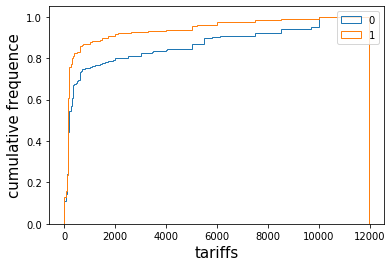

In [29]:
a.loc[a['label']==0]['amount_y'].dropna().plot.hist(bins=range(0,12000,50),histtype='step',label='0',normed=True,cumulative=True)
a.loc[df['label']==1]['amount_y'].dropna().plot.hist(bins=range(0,12000,50),histtype='step',label='1',normed=True,cumulative=True)
plt.legend(loc=1)
plt.xlabel('tariffs',size=15)
plt.ylabel('cumulative frequence',size=15)

In [30]:
df.columns

Index(['claim_id', 'enrollee_id', 'provider_id', 'provider_status', 'hmo_id',
       'care_id', 'qty', 'amount_x', 'approved_qty', 'approved_amount',
       'hmo_approved', 'created_at', 'vetted_at', 'label', 'unit_price', 'id',
       'diagnosis_id', 'amount_y'],
      dtype='object')

In [32]:
# re-assign column names
df.columns = ['claim_id', 'enrollee_id', 'provider_id', 'provider_status', 'hmo_id',
       'care_id', 'qty', 'amount', 'approved_qty', 'approved_amount',
       'hmo_approved', 'created_at', 'vetted_at', 'label', 'unit_price', 'id',
       'diagnosis_id', 'tariffs']

In [33]:
# save final data
df[['claim_id', 'enrollee_id', 'provider_id', 'hmo_id','care_id', 'diagnosis_id','qty', 'amount',\
    'unit_price','tariffs', 'created_at', 'vetted_at', 'label']].to_csv('Processed_data/all_data.csv')
       
      
        